In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

In [17]:
# Loading dataset from LFWE
lfw_dataset = fetch_lfw_people(min_faces_per_person=300)
_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
n_components = 300
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [19]:
# train a neural network
print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)


Fitting the classifier to the training set
Iteration 1, loss = 0.75134376
Validation score: 1.000000
Iteration 2, loss = 0.33597229
Validation score: 1.000000
Iteration 3, loss = 0.15362616
Validation score: 1.000000
Iteration 4, loss = 0.07623697
Validation score: 1.000000
Iteration 5, loss = 0.04130291
Validation score: 1.000000
Iteration 6, loss = 0.02454353
Validation score: 1.000000
Iteration 7, loss = 0.01574744
Validation score: 1.000000
Iteration 8, loss = 0.01078390
Validation score: 1.000000
Iteration 9, loss = 0.00782125
Validation score: 1.000000
Iteration 10, loss = 0.00594192
Validation score: 1.000000
Iteration 11, loss = 0.00469568
Validation score: 1.000000
Iteration 12, loss = 0.00386583
Validation score: 1.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [20]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

George W Bush       1.00      1.00      1.00       159

     accuracy                           1.00       159
    macro avg       1.00      1.00      1.00       159
 weighted avg       1.00      1.00      1.00       159



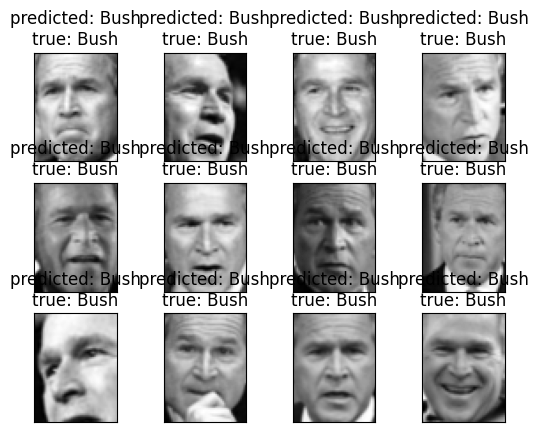

In [21]:
# Visualization
def plot_gallery(images, titles, h, w, rows=3, cols=4):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]].split(' ')[-1]
        true_name = target_names[y_test[i]].split(' ')[-1]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)
prediction_titles = list(titles(y_pred, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)